In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2025-08-30 09:31:39.013357: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756546299.306086      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756546299.401268      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Train shape: (33600, 784)
Validation shape: (8400, 784)

SVM Accuracy: 0.9171428571428571

Random Forest Accuracy: 0.9639285714285715


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-30 09:34:47.955011: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5
263/263 - 18s - 69ms/step - accuracy: 0.8808 - loss: 0.3973 - val_accuracy: 0.9688 - val_loss: 0.0995
Epoch 2/5
263/263 - 15s - 56ms/step - accuracy: 0.9647 - loss: 0.1196 - val_accuracy: 0.9767 - val_loss: 0.0698
Epoch 3/5
263/263 - 15s - 55ms/step - accuracy: 0.9732 - loss: 0.0874 - val_accuracy: 0.9829 - val_loss: 0.0571
Epoch 4/5
263/263 - 15s - 56ms/step - accuracy: 0.9789 - loss: 0.0691 - val_accuracy: 0.9855 - val_loss: 0.0499
Epoch 5/5
263/263 - 15s - 55ms/step - accuracy: 0.9810 - loss: 0.0585 - val_accuracy: 0.9857 - val_loss: 0.0462

CNN Validation Accuracy: 0.9857142567634583
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


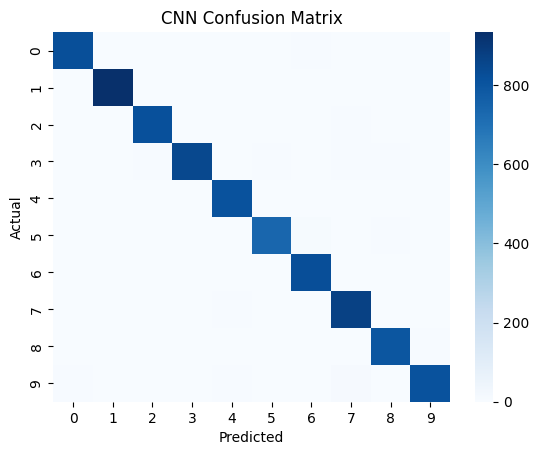


Model Comparison:
               Validation Accuracy
SVM                       0.917143
Random Forest             0.963929
CNN                       0.985714


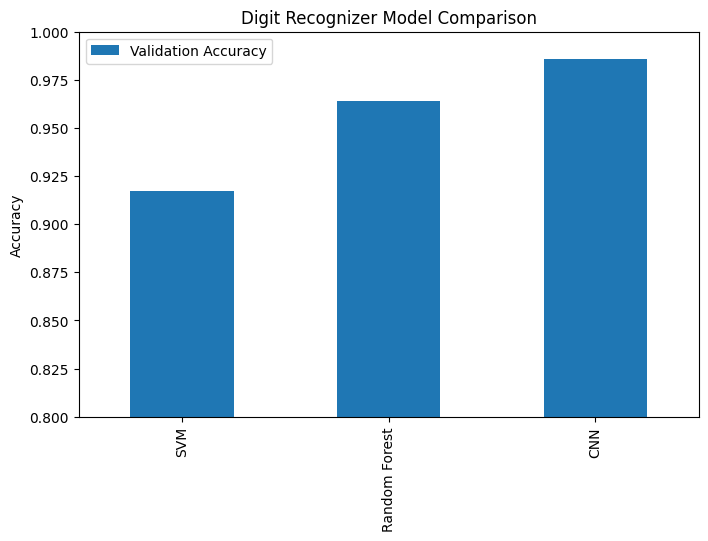

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [1]:
# Digit Recognizer (MNIST) with SVM, Random Forest, and CNN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

# 1. Load Dataset (Kaggle provides train.csv & test.csv)
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

# Separate features and target
X = train.drop("label", axis=1).values
y = train["label"].values

# Normalize pixel values (0–255 → 0–1)
X = X / 255.0
test = test / 255.0

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

# 2. SVM Classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_val_scaled)
print("\nSVM Accuracy:", accuracy_score(y_val, y_pred_svm))

# 3. Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_val)
print("\nRandom Forest Accuracy:", accuracy_score(y_val, y_pred_rf))

# 4. CNN Model (Deep Learning Intro)
X_train_cnn = X_train.reshape(-1,28,28,1)
X_val_cnn = X_val.reshape(-1,28,28,1)

y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes=10)

cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(
    X_train_cnn, y_train_cat,
    epochs=5,
    batch_size=128,
    validation_data=(X_val_cnn, y_val_cat),
    verbose=2
)

# Evaluate CNN
val_loss, val_acc = cnn_model.evaluate(X_val_cnn, y_val_cat, verbose=0)
print("\nCNN Validation Accuracy:", val_acc)

# 5. Confusion Matrix for CNN
y_pred_cnn = np.argmax(cnn_model.predict(X_val_cnn), axis=-1)
cm = confusion_matrix(y_val, y_pred_cnn)
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Compare Models
results = {
    'SVM': accuracy_score(y_val, y_pred_svm),
    'Random Forest': accuracy_score(y_val, y_pred_rf),
    'CNN': val_acc
}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Validation Accuracy'])
print("\nModel Comparison:")
print(results_df)

results_df.plot(kind='bar', figsize=(8,5), ylim=(0.8,1.0))
plt.title('Digit Recognizer Model Comparison')
plt.ylabel('Accuracy')
plt.show()

# 7. Generate Submission using best model (CNN here)
test_cnn = test.values.reshape(-1,28,28,1)
y_test_pred = np.argmax(cnn_model.predict(test_cnn), axis=-1)

submission = pd.DataFrame({"ImageId": np.arange(1,len(y_test_pred)+1), "Label": y_test_pred})
submission.to_csv("submission.csv", index=False)
